В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 
Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?


Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;
краткие описания каждого блока кода, объясняющие, что он делает;
необходимые графики (убедитесь, что на них подписаны оси);
выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
выводы по результатам выполнения задания.

# Проверка работы центральной предельной теоремы

## на примере распределения Фишера

In [1]:
#импортируем необходимые для выполнения задания библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

from scipy.stats import fatiguelife

# Распределение Фишера (F)


Функция плотности вероятности для F:  


https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

F = $\frac{Y_1 / d_1}{ Y_2 / d_2}$ - распределение Фишера (распределением Снедекора) со степенями свободы $d_1$ и $d_2$.
где $Y_1, Y_2$ — две независимые случайные величины, имеющие распределение хи-квадрат: $Y_i \sim \chi ^2(d_i)$, где $d_i \in N$; i=1, 2

Сгенерируем выборку из распределённой случайной величины F с параметрами $d_1$=29 и $d_2$=18:

Сгенерируем из него выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины 

In [2]:
d1, d2 = 29, 18 #задаем параметры формы
f_rv = sts.f(d1, d2) # зададим распределенную случайную величину F
my_rv = f_rv.rvs(size=1000) # сгенерируем выборку объёма 1000 

Text(0.5, 0, '$x$')

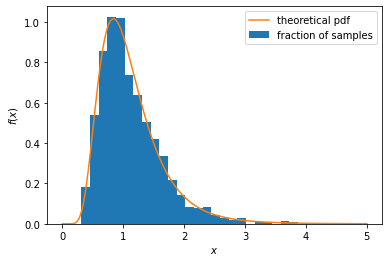

In [3]:
#Построим гистограмму выборки:
plt.hist(my_rv, density=True, bins=25, label='fraction of samples')

# на этом же графике построим теоретическую плотность распределения:
x = np.linspace(0,5,1000)
pdf = f_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')



# При трёх и более значениях n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построем гистограммы распределений их выборочных средних

Математическое ожидание случайной величины  
$\frac{d_2}{d_2 - 2}$  

Дисперсия:  
$\frac{2d_2^2(d_1 +d_2 -2)}{d_1  (d_2 -2)^2(d_2 - 4)}$  

In [4]:
mean = d2/(d2-2) #вычислим математическое ожидание
disp = (2*d2**2*(d1+d2-2))/(d1*((d2-2)**2)*(d2-4)) #вычислим дисперсию

print ("Мат.ожидание = {0} \nДисперсия = {1}".format(mean, disp))

Мат.ожидание = 1.125 
Дисперсия = 0.2805572660098522


сгенерируем 1000 выборок объёма n=5 и построим гистограммы распределений их выборочных средних

In [5]:
N=5                        #задаем значение объема выборки равной 5
vib_sredn=[]               #создаем пустой массив для хранения выборочных средних

for i in range(1000):      #запускаем цикл для генерации 1000 выборок
    n_rv = f_rv.rvs(size=N)                #генерируем выборку объема N=5
    vib_sredn.append(sum(n_rv)/N)      #высчитываем выборочное среднее

#vib_sredn = np.array(vib_sredn)   


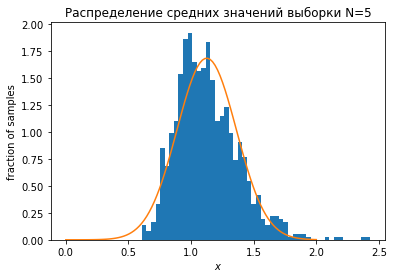

In [6]:
plt.hist(vib_sredn, density=True, bins=50) #строим гистограмму средних выборок
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("Распределение средних значений выборки N=5")

#построим диаграмму средне выборочного распределения
norm = sts.norm(loc=mean, scale=np.sqrt(disp/N))

x = np.linspace(0, 2, 100)
plt.plot(x, norm.pdf(x)) 

сгенерируем 1000 выборок объёма n=10 и построим гистограммы распределений их выборочных средних

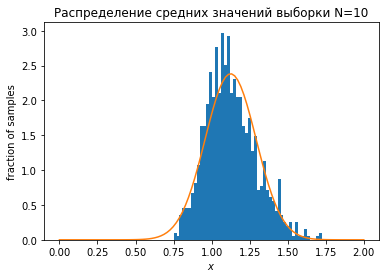

In [7]:
N=10
vib_sredn=[]
for i in range(1000):
    n_rv = f_rv.rvs(size=N)
    vib_sredn.append(np.mean(n_rv))
plt.hist(vib_sredn, density=True, bins=50)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("Распределение средних значений выборки N=10")

norm = sts.norm(loc=mean, scale=np.sqrt(disp/N))
x = np.linspace(0, 2, 100)
plt.plot(x, norm.pdf(x))

сгенерируем 1000 выборок объёма n=50 и построим гистограммы распределений их выборочных средних

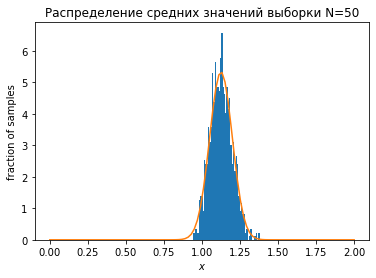

In [8]:
N=50
vib_sredn=[]
for i in range(1000):
    n_rv = f_rv.rvs(size=N)
    vib_sredn.append(np.mean(n_rv))
plt.hist(vib_sredn, density=True, bins=50)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title("Распределение средних значений выборки N=50")

norm = sts.norm(loc=mean, scale=np.sqrt(disp/N))
x = np.linspace(0, 2, 100)
plt.plot(x, norm.pdf(x))

# Вывод:

На примере распределения Фишера мы проверили Центральную предельную теорему:
Построили гистограммы распределения средних значений выборки при различных значениях объема выборки, а также на том же графике - диаграммы соответсвующих средне выборочных распределений с параметрами мат. ожидания и дисперсии от первоначального распределения.

В результате построения гистограмм средних значений видно, что при увеличении n распределения средних приближается к нормальному распределению.

В результате исследования распределения средних значений мы показали, что и среднее значение, и дисперсия данного распределения достаточно близки к теоретическим значениям. Кроме того, исследуемое распределение приближается к нормальному распределению при увеличении размера выборки.